In [1]:
#copied from 1.09 end to end.

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#put r in the beginning, 2. backslashes 3. 1 forward slash, utf-8 coding problem -> change encoding with latin1 type
df1=pd.read_csv(r'C:/Users/ilike/1.data/Mini_Project_/attacks.csv',encoding='latin1')

In [3]:
#standardizing title, make the copy of df1
df1.columns=df1.columns.str.lower().str.replace(" ","")
df2=df1.copy()

In [4]:
#checking NA values
df2.isna().sum()

casenumber              17021
date                    19421
year                    19423
type                    19425
country                 19471
area                    19876
location                19961
activity                19965
name                    19631
sex                     19986
age                     22252
injury                  19449
fatal(y/n)              19960
time                    22775
species                 22259
investigatororsource    19438
pdf                     19421
hrefformula             19422
href                    19421
casenumber.1            19421
casenumber.2            19421
originalorder           19414
unnamed:22              25722
unnamed:23              25721
dtype: int64

In [5]:
#remove rows if all rows are NA value(no infomation)
df2=df2.dropna(how='all')
df2

,casenumber,date,year,type,country,area,location,activity,name,sex,...,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.columns

Index(['casenumber', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal(y/n)', 'time',
       'species', 'investigatororsource', 'pdf', 'hrefformula', 'href',
       'casenumber.1', 'casenumber.2', 'originalorder', 'unnamed:22',
       'unnamed:23'],
      dtype='object')

In [7]:
#dropping if casenumbers are same
df2=df2.drop_duplicates(subset=['casenumber.1'])
#drop unecessary columns
df2=df2.drop(['name','investigatororsource','pdf','hrefformula','href',"casenumber.1","casenumber.2",'originalorder',"unnamed:22","unnamed:23"], axis=1)
df2

,casenumber,date,year,type,country,area,location,activity,sex,age,injury,fatal(y/n),time,species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,FATAL,Y,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN


In [8]:
#put "FATAL" in fatal(y/n) columns if injury column startswith FATAL
df2.loc[(df2['fatal(y/n)'].isna())&(df2['injury'].str.startswith('FATAL')),'fatal(y/n)']='FATAL'

In [9]:
#check what kind of values are in fatal(y/n)
df2['fatal(y/n)'].value_counts()

N          4284
Y          1384
UNKNOWN      71
FATAL        35
 N            7
M             1
2017          1
N             1
y             1
Name: fatal(y/n), dtype: int64

In [10]:
#drop casenumber, injury column
df2=df2.drop(['casenumber','injury'],axis=1)
df2=df2.drop(columns=['species'])
df2

,date,year,type,country,area,location,activity,sex,age,fatal(y/n),time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,M,15,Y,NaN


In [136]:
#drop if fatal(y/n) value is unknown or number, make all values only with Y/N
df2=df2.drop(df2[df2['fatal(y/n)']=="UNKNOWN"].index)
df2['fatal(y/n)']=df2['fatal(y/n)'].replace(['FATAL','y'],'Y')
df2['fatal(y/n)']=df2['fatal(y/n)'].replace([' N','N '],'N')
#drop if fatal is not N or Y 
df2=df2[df2['fatal(y/n)'].isin(['N','Y'])]
df2['fatal(y/n)'].value_counts()

N    4292
Y    1420
Name: fatal(y/n), dtype: int64

In [137]:
#change column name to easy writing
df2=df2.rename(columns={'fatal(y/n)':'fatal'})
df2

,date,year,type,country,area,location,activity,sex,age,fatal,time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,Y,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN


In [138]:
df2.isna().sum()

date           0
year           1
type           3
country       45
area         402
location     477
activity     388
sex          457
age         2473
fatal          0
time        2918
dtype: int64

<AxesSubplot:xlabel='fatal', ylabel='count'>

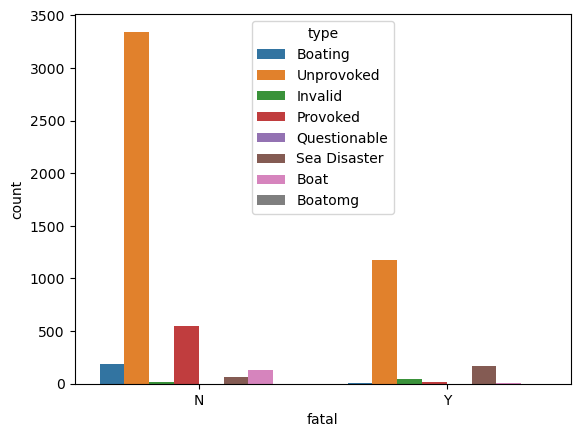

In [112]:
#still some data is empty but fatal or not is trimmed So I will first start charting.
sns.countplot(data=df2, x='fatal', hue='type')

<AxesSubplot:xlabel='fatal', ylabel='count'>

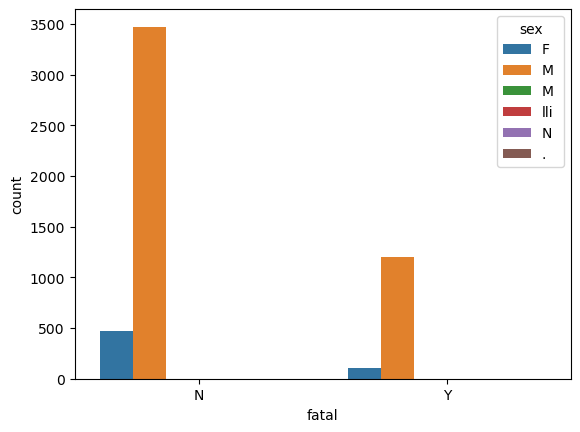

In [114]:
sns.countplot(data=df2, x='fatal', hue='sex')

<AxesSubplot:xlabel='count', ylabel='sex'>

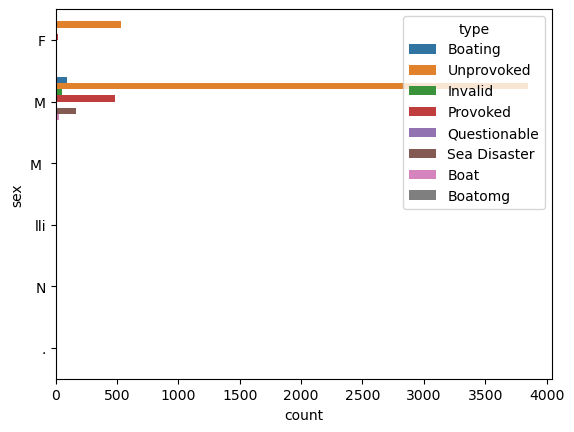

In [117]:
sns.countplot(data=df2, y='sex', hue='type')

In [121]:
df2['date'].nunique()

4954

In [140]:
df2

,date,year,type,country,area,location,activity,sex,age,fatal,time
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,18h00
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,14h00 -15h00
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,07h45
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,M,NaN,Y,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,M,NaN,Y,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN


In [144]:
#check what kind of values are in fatal(y/n)
df2['location'].value_counts()

New Smyrna Beach, Volusia County               159
Daytona Beach, Volusia County                   30
Ponce Inlet, Volusia County                     20
Melbourne Beach, Brevard County                 17
Myrtle Beach, Horry County                      16
                                              ... 
Sebastian Inlet, Indian River County             1
The Rocks, Hutchinson Island, Martin County      1
Kowie River                                      1
Yoff Island                                      1
Below the English fort, Trincomalee              1
Name: location, Length: 3771, dtype: int64

In [193]:
#found there are still too many unwanted complexities in columns I'd like to start small with df3
df3=df2.copy()

In [194]:
df3=df3.drop(['date','year','area','location'],axis=1)

In [195]:
#more data cleaning of df3, I will fill age with average value.
df3

,type,country,activity,sex,age,fatal,time
0,Boating,USA,Paddling,F,57,N,18h00
1,Unprovoked,USA,Standing,F,11,N,14h00 -15h00
2,Invalid,USA,Surfing,M,48,N,07h45
3,Unprovoked,AUSTRALIA,Surfing,M,NaN,N,NaN
4,Provoked,MEXICO,Free diving,M,NaN,N,NaN
...,...,...,...,...,...,...,...
6297,Unprovoked,AUSTRALIA,Diving,M,NaN,Y,NaN
6298,Unprovoked,AUSTRALIA,Pearl diving,M,NaN,Y,NaN
6299,Unprovoked,USA,Swimming,M,NaN,Y,NaN
6300,Unprovoked,PANAMA,NaN,M,NaN,Y,NaN


In [196]:
#more data cleaning of df3, I will fill age with average value.
print(df3['age'].isna().sum())
print()
print()
print(df3['age'].value_counts())
print()
print()
print(df3.dtypes)

2473


18          142
17          138
15          137
16          135
19          135
           ... 
20            1
>50           1
18 to 22      1
adult         1
13 or 14      1
Name: age, Length: 148, dtype: int64


type        object
country     object
activity    object
sex         object
age         object
fatal       object
time        object
dtype: object


In [197]:
#change age column to float type in order to get avrage age and fillna
#use regex to find 
df3['age'] = df3['age'].apply(lambda x: re.sub('[^0-9]','',str(x)))
df3['age'] = pd.to_numeric(df3['age'], errors='coerce')
df3['age'].isna().sum()

2502

In [198]:
#unfortunately there must be lots of bias data due to descriptive contents I need to see how values are present here
df3['age'].value_counts()

18.0      143
20.0      141
17.0      138
15.0      137
16.0      135
         ... 
3230.0      1
87.0        1
75.0        1
2126.0      1
1314.0      1
Name: age, Length: 108, dtype: int64

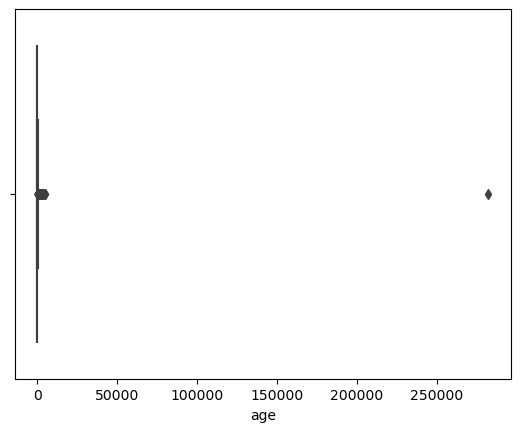

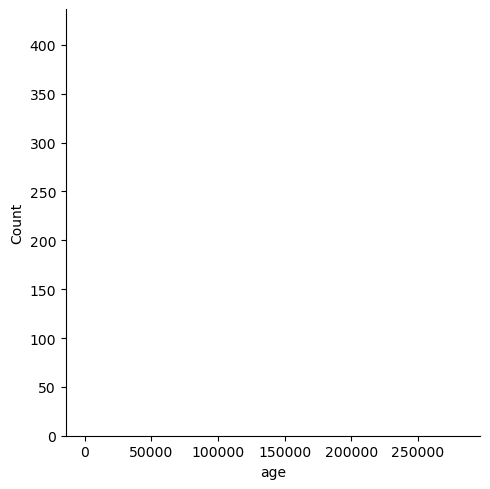

In [205]:
average_age=df3['age'].between(0,100).mean()
df3.loc[~df3['age'].between(0,100),'age']=